In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + x2 - 3

In [3]:
C1 = np.where(g >= 1)
C0 = np.where(g < -1)
print(C1)

(array([ 8, 10, 11, 12, 13, 14, 15, 18, 21, 27, 28, 31, 32, 36, 37, 40, 42,
       46, 49, 52, 53, 54, 56, 57, 58, 59, 61, 65, 66, 68, 69, 70, 72, 76,
       82, 83, 84, 85, 89, 90, 93, 96], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64))


In [4]:
C1 = np.where(g >= 1)[0]
C0 = np.where(g < -1)[0]
print(C1.shape)
print(C0.shape)

(42,)
(37,)


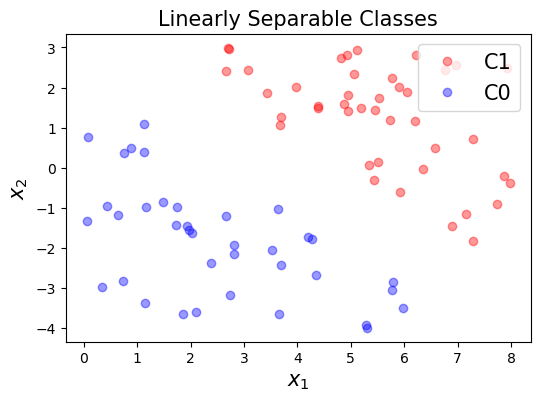

In [5]:
plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.title('Linearly Separable Classes', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()

In [6]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([C0.shape[0],1]), x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

In [7]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = y.shape[0]
flag = 0

while flag == 0:
    flag = 1
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w += y[i,0]*X[i,:].T
            flag = 0

print(w)

[[-36.        ]
 [ 11.67214791]
 [ 19.81660385]]


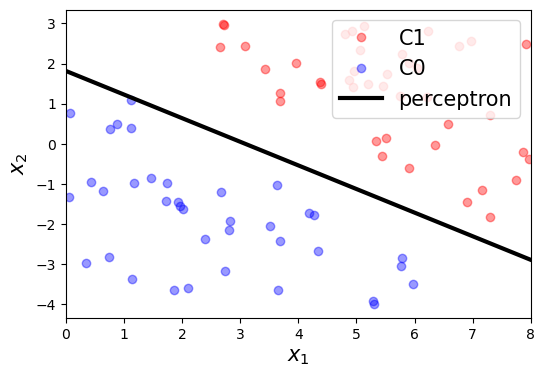

In [8]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, c = 'k', linewidth = 3, label = 'perceptron')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.show()

# Using Scikit Learn

In [9]:
X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

In [10]:
from sklearn import linear_model

clf = linear_model.Perceptron(tol = 1e-3)
clf.fit(X, np.ravel(y))

Perceptron()

In [11]:
clf.predict([[3, -2]])

array([-1.])

In [12]:
clf.predict([[6, 2]])

array([1.])

In [13]:
clf.coef_

array([[3.9658355 , 6.82973844]])

In [14]:
clf.intercept_

array([-13.])

In [15]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

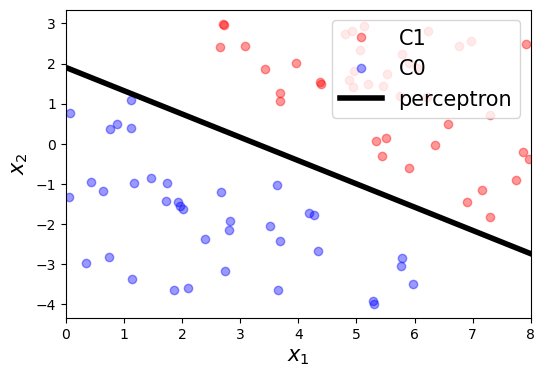

In [16]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w1/w2*x1p - w0/w2

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, c = 'k', linewidth = 4, label = 'perceptron')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.show()